In [1]:
import subprocess
import time
subprocess.check_output(["maturin", "develop"])

🍹 Building a mixed python/rust project
🔗 Found pyo3 bindings
🐍 Found CPython 3.10 at /home/wint3rmute/code/luthier/.venv/bin/python
📡 Using build options features from pyproject.toml
    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
📦 Built wheel for CPython 3.10 to /tmp/.tmp8r9tKU/luthier-0.1.0-cp310-cp310-linux_x86_64.whl
🛠 Installed luthier-0.1.0


b''

In [6]:
import numpy as np
import audioflux as af
from audioflux.type import SpectralFilterBankScaleType
from IPython.display import Audio, display, Image, HTML
import matplotlib.pyplot as plt
from audioflux.display import fill_spec
import PIL
from tqdm.notebook import trange, tqdm
from copy import deepcopy
from IPython.display import clear_output
import librosa
from scipy.optimize import differential_evolution
import soundfile as sf
from multiprocessing import Pool
import os
from luthier.luthier import DspGraph, SineOscillator
plt.rcParams['figure.dpi'] = 110
SAMPLE_RATE = 22050

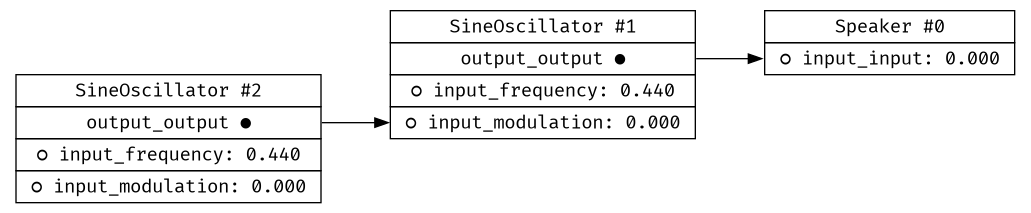

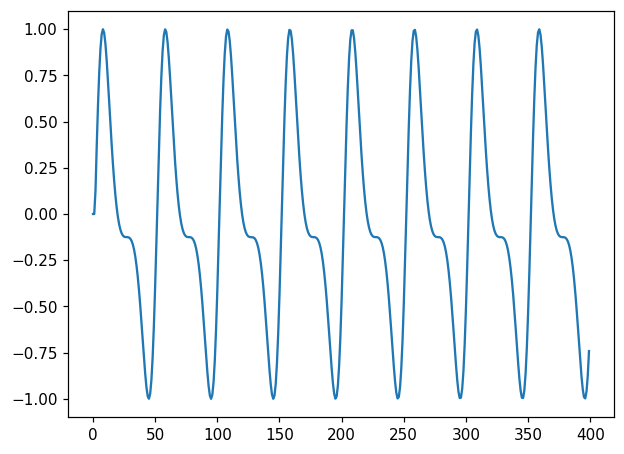

In [7]:
g = DspGraph()

sine = SineOscillator()
sine.input_frequency = 0.440
sine_id = g.add_sine(sine)

g.patch( sine_id, "output_output", 1, "input_modulation" )

display(Image(g.draw()))
plt.plot(g.play(400))

In [8]:
def one_operator_fm():
    graph = get_starting_graph()

    modulator = graph.add_sine(SineOscillator())
    _carrier = SineOscillator()
    # _carrier.inputs.modulation_index = 0.05
    carrier = graph.add_node(_carrier)
    mod_index_scaler = graph.add_node(Multiplier())
    mod_freq_mult = graph.add_node(HarmonicMultiplier())
    
    graph.nodes[mod_index_scaler].inputs.scale = 0.70
    graph.nodes[mod_freq_mult].inputs.scale = 0.45
    graph.nodes[1].inputs.attack = 0.001
    graph.nodes[1].inputs.sustain = 0.1
    graph.nodes[1].inputs.release = 0.2

    graph.patch(carrier, "output", 1, "input")
    graph.patch(2, "output", carrier, "frequency")
    graph.patch(2, "output", mod_freq_mult, "input" )
    graph.patch(mod_freq_mult, "output", modulator, "frequency")
    graph.patch(modulator, "output", mod_index_scaler, "input")
    graph.patch(mod_index_scaler, "output", carrier, "modulation")
    
    return graph

target_graph = one_operator_fm()

target_audio = target_graph.play(num_samples = SAMPLE_RATE * 1)
display(Image(target_graph.draw()))

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=False, sharey=False)
target_audio.plot_spectrogram(ax1)
target_audio.plot_waveform(ax2)
target_audio.plot_mfcc(ax3)
target_audio.show_player()

NameError: name 'get_starting_graph' is not defined